In [301]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy 
import statistics as st
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go


des fonction loacl 

In [1]:
from importlib import reload
import defini_coef
reload(defini_coef)
import util
reload(util)
import simulation
reload(simulation)
import pilot_tache_distribution
reload(pilot_tache_distribution)
from defini_coef import *
from pilot_tache_distribution import*
from simulation import *
from util import *


[3.4846008045628034, 4.369265648540969, 5.491594331398818, 6.936588209402446, 8.661966100626643, 10.914539589230104, 13.743787830297093, 16.699669037907086, 20.677457916940487, 25.04175613990096]


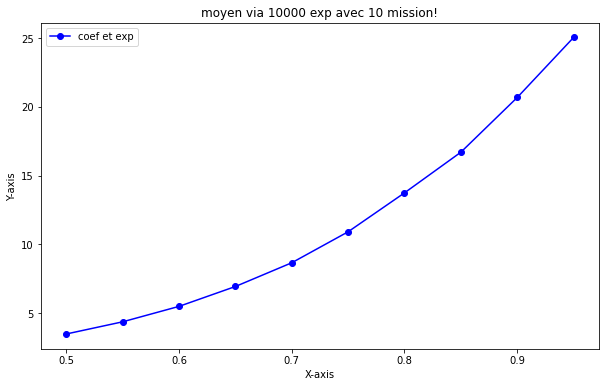

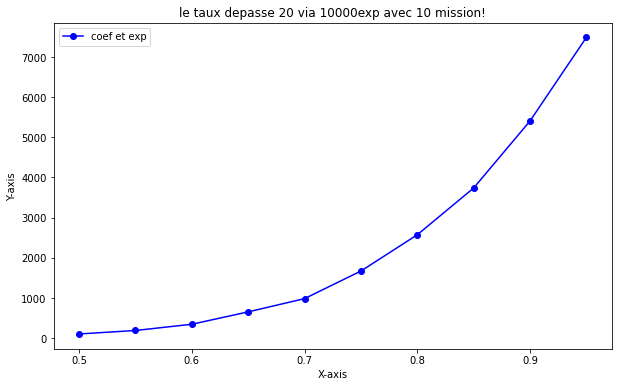

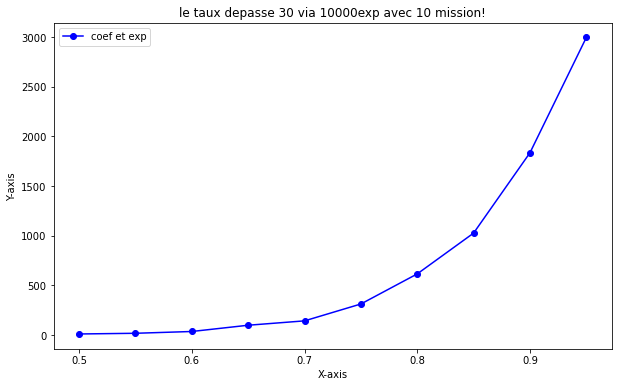

In [304]:

nb_mission= 10
nb_coef = 30
n_d=3
t_s=10
cp=[0.3,0.2,0.1]
cr=[0.1,0.2,0.3]
ce=[1,2,3]
exp_seuil = [30,70]

exp_max = 100
exp_min = 0
proba = [0.5,1]
step = 0.05
size_t = len(np.arange(proba[0], proba[1], step))
depasse_20 = [0]*size_t
depasse_30 = [0]*size_t
exp_moyen =[0]*size_t
for j in range(0,10000):
    exp = defini_coef.simule_exp_prob(nb_mission, nb_coef, n_d, t_s, cp, cr, ce, exp_seuil, exp_max, exp_min, proba, step)
    for i in range(0, size_t):
        exp_moyen[i] = exp_moyen[i] +  exp[i]
        if exp[i] >= 30:
            depasse_30[i] = depasse_30[i]+1
        if exp[i] >= 20:
            depasse_20[i] = depasse_20[i]+1
moyen = [element / 10000 for element in exp_moyen]
print(moyen)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(proba[0], proba[1],step), moyen, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('moyen via 10000 exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(proba[0], proba[1],step), depasse_20, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('le taux depasse 20 via 10000exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(proba[0], proba[1],step), depasse_30, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('le taux depasse 30 via 10000exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()
 

condition fixe coef cr 3 6 9 cp 9 6 3 nb_mission10

avec ces graph on peut constate que  avec une taux de reussite 95% les utilisateur a 70% de chance d'attein le niveau moyen si le seuil est 20,  30% pour la seuil  30, une moyen de score 25

avec ces graph on peut constate que  avec une taux de reussite 90% les utilisateur a 50% de chance d'attein le niveau moyen si le seuil est 20,  20% pour la seuil  30, une moyen de score 20



[75.44516666970189, 75.8903333394041, 76.33550000910594, 76.78066667880795, 77.22583334850978, 77.67100001821186, 78.11616668791386, 78.5613333576162, 79.00552853950452, 79.44565607585476, 79.86956759216426, 80.25823879388177, 80.5924137510465, 80.8642536191743, 81.0751359248438, 81.22662881080149, 81.32021431148229, 81.35894755544976, 81.34906112804853, 81.2960386629117, 81.20393323989353, 81.08310896979698, 80.93506872326574, 80.76535153492074, 80.57566389056693, 80.36810804450884, 80.14566908402438, 79.91101617130012, 79.66764335592248, 79.41434661319748]


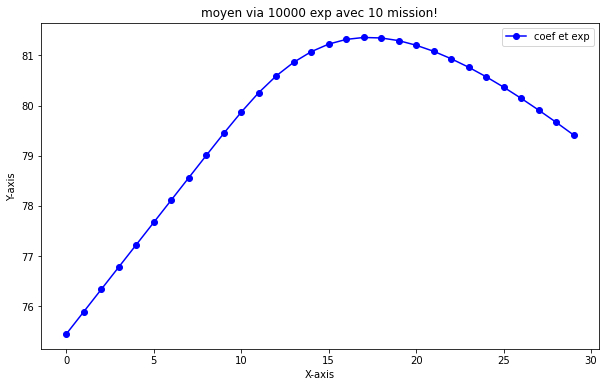

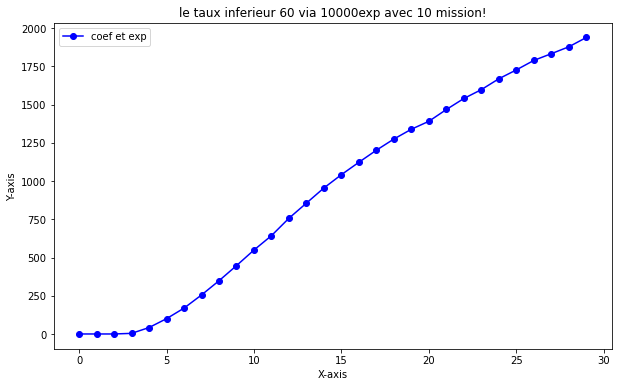

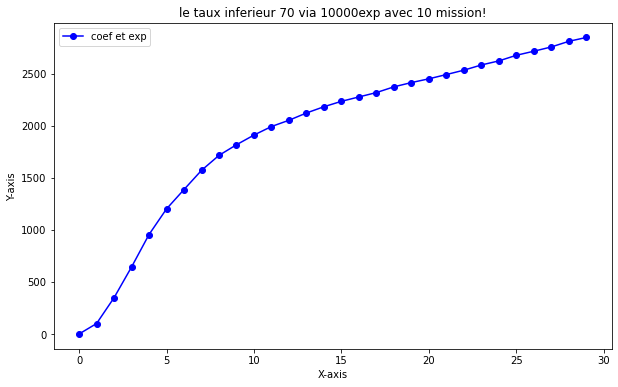

In [17]:

n_d=3
t_s=10
cp=[0.3,0.2,0.1]
cr=[0.1,0.2,0.3]
ce=[1,2,3]
exp_seuil1 = 30
exp_seuil2 = 70
exp_max = 100
nb_mission= 10
exp_init=75
proba = [[0.9,0.1], [0.8,0.2], [0.7,0.3]]
exp_seuil = [exp_seuil1, exp_seuil2]
size_t = nb_coef
depasse_60 = [0]*size_t
depasse_70 = [0]*size_t
exp_moyen =[0]*size_t

for j in range(0,10000):
    exp =simule_exp_avance(nb_mission, nb_coef, n_d, t_s, cp, cr, ce, exp_seuil, exp_max, exp_min, proba, exp_init)

    for i in range(0, nb_coef):
        exp_moyen[i] = exp_moyen[i] +  exp[i]
        if exp[i] <= 60:
            depasse_60[i] = depasse_60[i]+1
        if exp[i] <= 70:
            depasse_70[i] = depasse_70[i]+1
moyen = [element / 10000 for element in exp_moyen]
print(moyen)
plt.figure(figsize=(10, 6))
plt.plot(range(0,nb_coef), moyen, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('moyen via 10000 exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0,nb_coef), depasse_60, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('le taux inferieur 60 via 10000exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()

# Display the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(0,nb_coef), depasse_70, label='coef et exp', color='blue', marker='o')

# Title and labels
plt.title('le taux inferieur 70 via 10000exp avec 10 mission!')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Legend
plt.legend()

# Display the plot
plt.show()

    

ici on laisse le pilote execute des tache aux hasard
avec ces graphe on peut constatet que avec des prob fixe [0.9,0.1], [0.8,0.2], [0.7,0.3]  avec 10 mision et avec coef 369 on peut attein une moyen 79

le taux qu'il inferieur a 70 est 30

le taux qu'il inferieur a 60 est 20

partie distribution et affectation

# exp 1 cette experience fait varie le nombre d'tache  et fix 5 pilot  et autre parameter

In [146]:
nb_pilot =5
expRange = [0,90]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.8
nb_mission_range = range(5,30,2)
pilotPool = generatePilotPool(nb_pilot, expRange, seuil, workloadRange, recuperation)
for p in pilotPool:
    print(p)
mission = v_nb_m.experience(pilotPool, nb_mission_range, prob_reussi, nb_exp, puni, timeRange)


Pilot(exp=11, level=0, workload=66, tache=[], r=1, capacite=66, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=20, level=0, workload=71, tache=[], r=1, capacite=71, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=80, level=2, workload=63, tache=[], r=1, capacite=63, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=58, level=1, workload=64, tache=[], r=1, capacite=64, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=13, level=0, workload=67, tache=[], r=1, capacite=67, t=0, needUpdate=False, updatePoint=0,nature=0)


In [147]:
moyen, stdev, max_m, min_m, count_mission_complet, median, mode = getStat(mission,step=2,start=5)

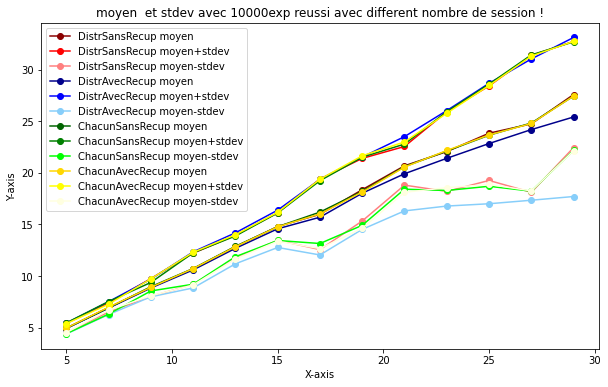

In [148]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "ChacunSansRecup", "ChacunAvecRecup"]
v_nb_m.affichage_moyen_stdev(nb_mission_range, moyen,stdev, listalgo)

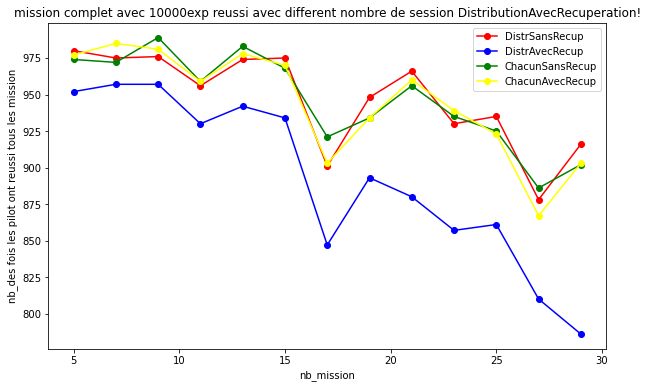

In [149]:
v_nb_m.affichage_mission_complet(nb_mission_range, count_mission_complet, listalgo)

constat

# exp 2 dans cet experience le nombre de tache se varie  et nous avon une probalilite de ajoute des tache

In [19]:
from importlib import reload
import defini_coef
reload(defini_coef)
import util
reload(util)
import simulation
reload(simulation)
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*
from simulation import *
from util import *
import exp_v_nb_mission as v_nb_m 

In [299]:
nb_pilot = 10
expRange = [0,90]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.8
nb_mission_range=range(15,50,2)
pilotPool = generatePilotPool(nb_pilot, expRange, seuil, workloadRange, recuperation)

mission = v_nb_m.experience(pilotPool, nb_mission_range, prob_reussi, nb_exp, puni,timeRange= timeRange, insere = True)

moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStat(mission,step = 2,start=15)

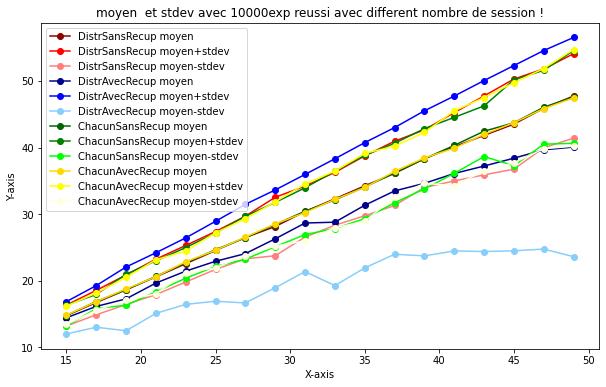

In [300]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "ChacunSansRecup", "ChacunAvecRecup"]
v_nb_m.affichage_moyen_stdev(nb_mission_range, moyen,stdev, listalgo)

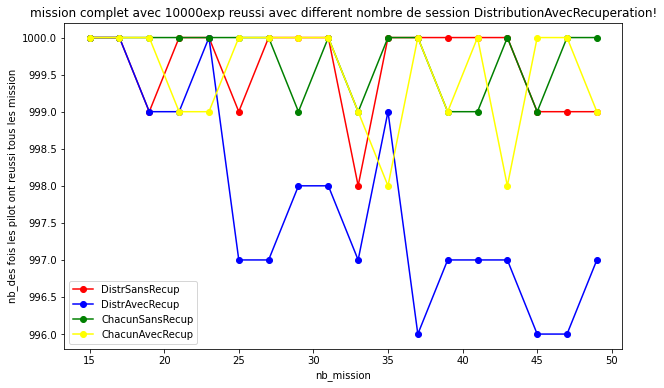

In [225]:
v_nb_m.affichage_mission_complet(nb_mission_range, count_mission_complet, listalgo)

In [186]:
import exp_v_nb_mission_pilot
reload(exp_v_nb_mission_pilot)
import exp_v_nb_mission_pilot as v_nb_m_p

# dans cet experience le nombre de tache et le nombre de tache se varie 

In [226]:
nb_pilot =5
expRange = [0,90]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.8
nb_mission_range = range(5,20,2)
nb_pilot_range = range(5,10)

mission = v_nb_m_p.experience(nb_pilot_range,expRange, seuil, workloadRange, recuperation, nb_mission_range, prob_reussi, nb_exp, puni, timeRange=timeRange)



In [227]:
moyen, stdev, max_m, min_m, count_mission_complet, median , mode = getStatdiff(mission)

In [228]:
y1, x1 = np.meshgrid(nb_mission_range,nb_pilot_range)

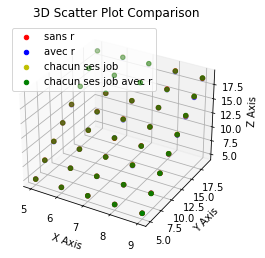

In [229]:

z=np.array(moyen)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data set 1
ax.scatter(x1, y1, z[0], color='r', label='sans r')

# Plotting data set 2
ax.scatter(x1, y1, z[1], color='b', label='avec r ')

ax.scatter(x1, y1, z[2], color='y', label='chacun ses job')

# Plotting data set 2
ax.scatter(x1, y1, z[3], color='g', label='chacun ses job avec r')


# Adding labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot Comparison')

# Adding legend
ax.legend()

# Show plot
plt.show()

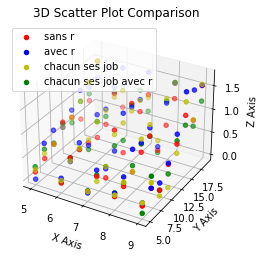

In [230]:
z=np.array(stdev)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data set 1
ax.scatter(x1, y1, z[0], color='r', label='sans r')

# Plotting data set 2
ax.scatter(x1, y1, z[1], color='b', label='avec r ')

ax.scatter(x1, y1, z[2], color='y', label='chacun ses job')

# Plotting data set 2
ax.scatter(x1, y1, z[3], color='g', label='chacun ses job avec r')


# Adding labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot Comparison')

# Adding legend
ax.legend()

# Show plot
plt.show()

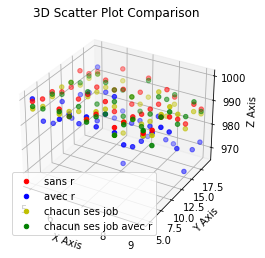

In [231]:
z=np.array(count_mission_complet)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data set 1
ax.scatter(x1, y1, z[0], color='r', label='sans r')

# Plotting data set 2
ax.scatter(x1, y1, z[1], color='b', label='avec r ')

ax.scatter(x1, y1, z[2], color='y', label='chacun ses job')

# Plotting data set 2
ax.scatter(x1, y1, z[3], color='g', label='chacun ses job avec r')


# Adding labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot Comparison')

# Adding legend
ax.legend()

# Show plot
plt.show()

In [232]:

expRange = [0,90]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.9]]
puni = 0.8
prob_tache = [0.2, 0.5, 0.3]
nb_mission_range = range(5,20,2)
nb_pilot_range = range(5,10)
mission = v_nb_m_p.experience(nb_pilot_range,expRange, seuil, workloadRange, recuperation, nb_mission_range, prob_reussi, nb_exp, puni, timeRange=timeRange, prob_tache = prob_tache)


In [211]:
moyen, stdev, max_m, min_m, count_mission_complet, median , mode = getStatdiff(mission)
y1, x1 = np.meshgrid(nb_mission_range,nb_pilot_range)

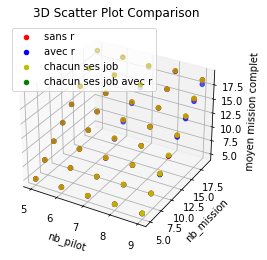

In [212]:
z=np.array(moyen)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data set 1
ax.scatter(x1, y1, z[0], color='r', label='sans r')

# Plotting data set 2
ax.scatter(x1, y1, z[1], color='b', label='avec r ')

ax.scatter(x1, y1, z[2], color='y', label='chacun ses job')

# Plotting data set 2
ax.scatter(x1, y1, z[3], color='g', label='chacun ses job avec r')


# Adding labels and title
ax.set_xlabel('nb_pilot')
ax.set_ylabel('nb_mission')
ax.set_zlabel('moyen mission complet')
ax.set_title('3D Scatter Plot Comparison')

# Adding legend
ax.legend()

# Show plot
plt.show()

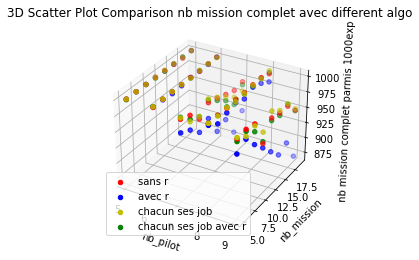

In [213]:
z = np.array(count_mission_complet)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data set 1
ax.scatter(x1, y1, z[0], color='r', label='sans r')

# Plotting data set 2
ax.scatter(x1, y1, z[1], color='b', label='avec r ')

ax.scatter(x1, y1, z[2], color='y', label='chacun ses job')

# Plotting data set 2
ax.scatter(x1, y1, z[3], color='g', label='chacun ses job avec r')


# Adding labels and title
ax.set_xlabel('nb_pilot')
ax.set_ylabel('nb_mission')
ax.set_zlabel('nb mission complet parmis 1000exp')
ax.set_title('3D Scatter Plot Comparison nb mission complet avec different algo')

# Adding legend
ax.legend()

# Show plot
plt.show()

# stra compare le fait d'avoir ia en varie le temp de mission

In [33]:
import exp_v_time_mission 
reload(exp_v_time_mission)
import exp_v_time_mission as exp_vtm
import util
reload(util)
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*
from util import *

In [34]:

exps =[30,90]

workloads =[80,80]
seuil = [0,20, 70]

recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)

time_range=range(120,240,20)
mission,listlen = exp_vtm.experience(pilotPool, seuil, time_range,  prob_reussi, nb_exp, puni)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

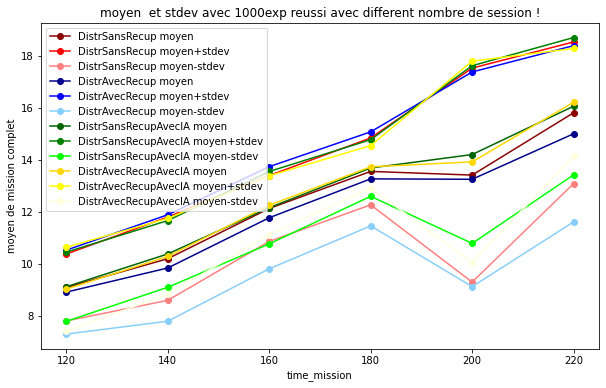

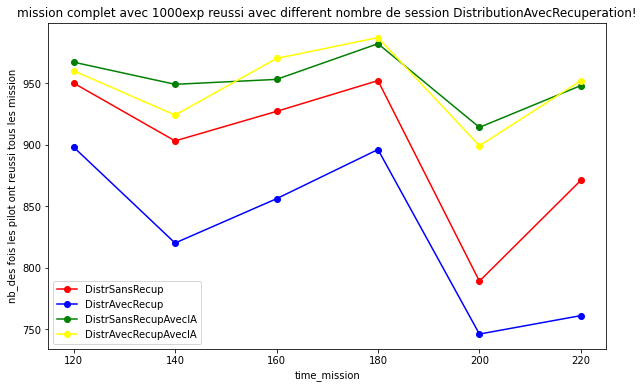

NameError: name 'plt' is not defined

In [35]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "DistrSansRecupAvecIA", "DistrAvecRecupAvecIA"]
exp_vtm.affichage_moyen_stdev_v_time_mission(time_range, moyen, stdev, listalgo)
exp_vtm.affichage_mission_complet(time_range, count_mission_complet, listalgo)


# exp compare le fait d'avoir ia en varie le temp de recuperation

In [36]:
import exp_v_recuperation 
reload(exp_v_recuperation)
import exp_v_recuperation as exp_vr

In [37]:
exps =[30,90]
expRange = [0,90]
workloads =[40,40]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
r_range=range(1,11,1)
t= timeTotal

tachePool = generateTacheAlter(t,timeRange)

mission, listlen = exp_vr.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

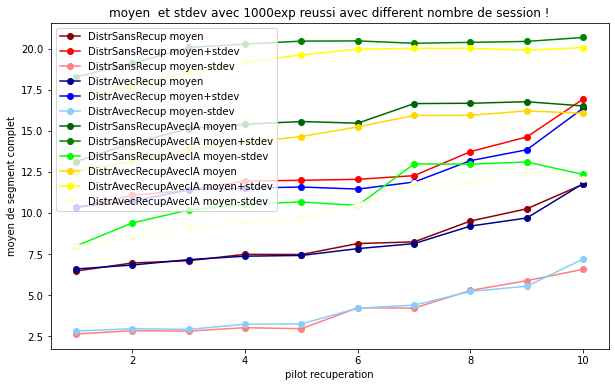

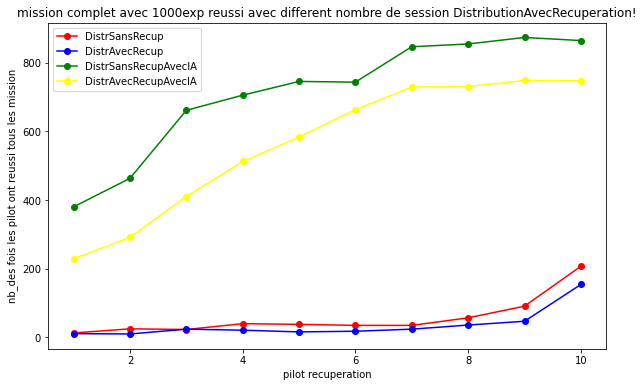

In [38]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "DistrSansRecupAvecIA", "DistrAvecRecupAvecIA"]
exp_vr.affichage_moyen_stdev_v_recuperation(r_range, moyen, stdev, listalgo)
exp_vr.affichage_mission_complet(r_range, count_mission_complet, listalgo)

# exp compare le fait d'avoir ia  le changement de la resultat avec stra plus bas possible

In [39]:
exps =[30,90]
expRange = [0,90]
workloads =[40,40]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
r_range=range(1,11,1)
t= timeTotal

tachePool = generateTacheAlter(t,timeRange)

mission, listlen = exp_vr.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni, stra = False)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

#moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStat(mission_ai)

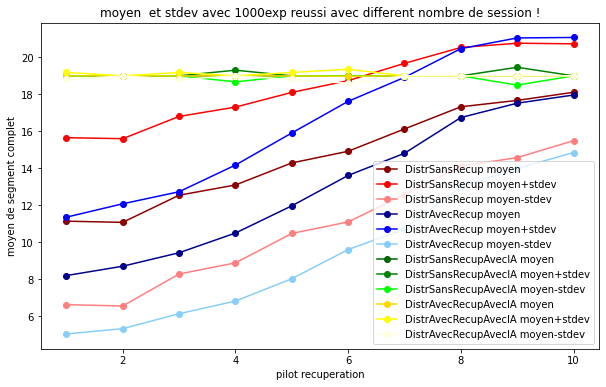

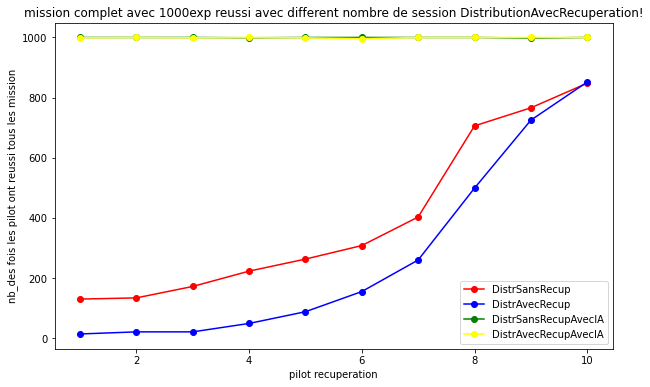

In [40]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "DistrSansRecupAvecIA", "DistrAvecRecupAvecIA"]
exp_vr.affichage_moyen_stdev_v_recuperation(r_range, moyen, stdev, listalgo)
exp_vr.affichage_mission_complet(r_range, count_mission_complet, listalgo)

# exp compare les example with tous les tache sont prevu et avec different startegy

In [41]:
import exp_v_stra_recuperation 
reload(exp_v_stra_recuperation)
import exp_v_stra_recuperation as exp_vsr

In [42]:
exps =[30,90]

workloads =[40,40]
seuil = [0,20, 70]

recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
x=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange)
mission, listlen = exp_vsr.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)
#moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStat(mission_ai)

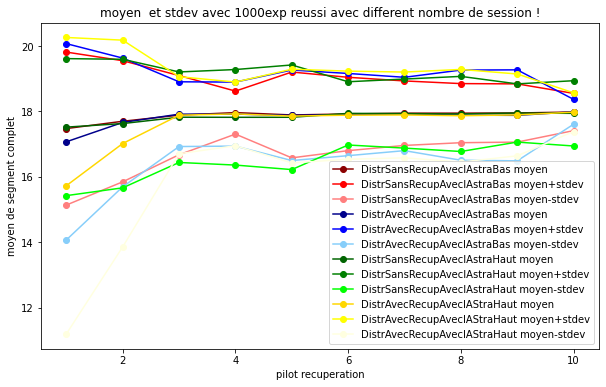

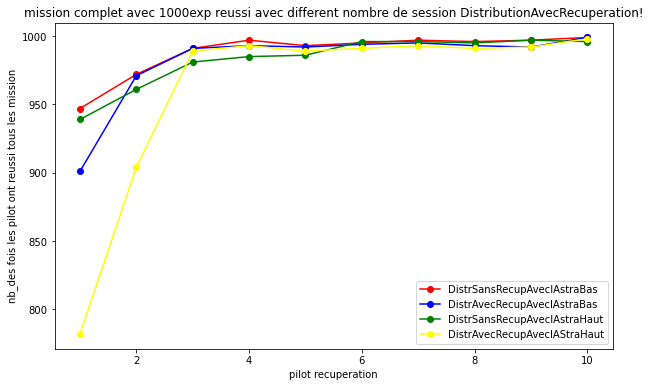

In [43]:
listalgo = ["DistrSansRecupAvecIAstraBas", "DistrAvecRecupAvecIAstraBas", "DistrSansRecupAvecIAstraHaut", "DistrAvecRecupAvecIAStraHaut"]
exp_vsr.affichage_moyen_stdev_v_stra_recuperation(r_range, moyen, stdev, listalgo)
exp_vsr.affichage_mission_complet(r_range, count_mission_complet, listalgo)

# compare les 2 strategy avec distribution avec r et sans et avec les tache sont lie

In [44]:
exps =[30,90]
expRange = [0,90]
workloads =[40,40]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5

x=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange)
mission, listlen = exp_vsr.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni, insere = True)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

#moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStat(mission_ai)

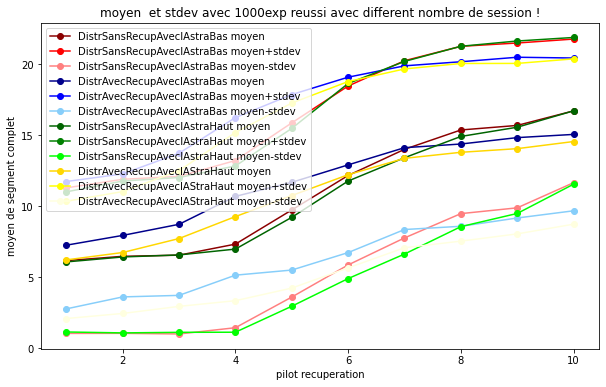

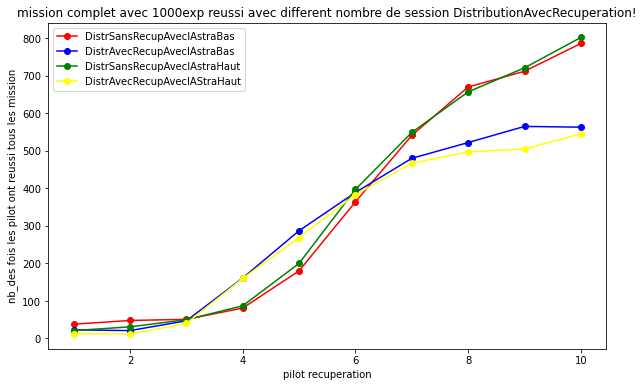

In [45]:
listalgo = ["DistrSansRecupAvecIAstraBas", "DistrAvecRecupAvecIAstraBas", "DistrSansRecupAvecIAstraHaut", "DistrAvecRecupAvecIAStraHaut"]
exp_vsr.affichage_moyen_stdev_v_stra_recuperation(r_range, moyen, stdev, listalgo)
exp_vsr.affichage_mission_complet(r_range, count_mission_complet, listalgo)


# exps sur les simulation avec une prob d'insertion mais si on a rate ces mission il na pas influence  sur ces example

In [46]:
exps =[30,90]
expRange = [0,90]
workloads =[40,40]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5

r_range=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange)
mission, listlen = exp_vsr.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni, insere = True, relation_tache = False)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

#moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStat(mission_ai)      
     

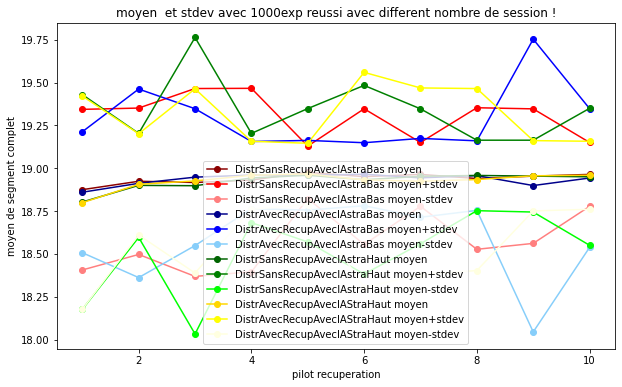

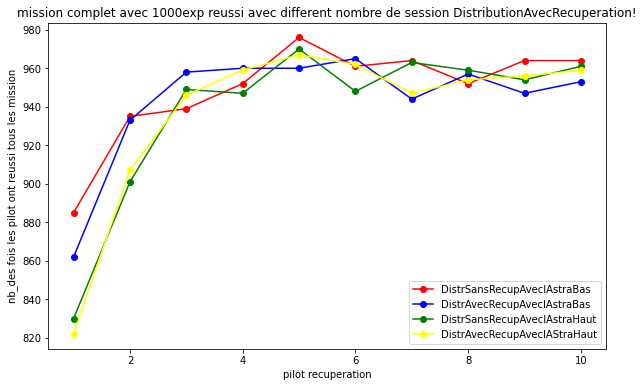

In [47]:
listalgo = ["DistrSansRecupAvecIAstraBas", "DistrAvecRecupAvecIAstraBas", "DistrSansRecupAvecIAstraHaut", "DistrAvecRecupAvecIAStraHaut"]
exp_vsr.affichage_moyen_stdev_v_stra_recuperation(r_range, moyen, stdev, listalgo)
exp_vsr.affichage_mission_complet(r_range, count_mission_complet, listalgo)

# dans cet experience on a experiment une fois le tache failed le mission s'arrete avec le startegy que l'exp plus haut va faire la tache

In [ ]:
from importlib import reload
import defini_coef
reload(defini_coef)
import util
reload(util)
import simulation
reload(simulation)
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*
from simulation import *
from util import *

In [ ]:

import exp_v_recuperation_avecIA 
reload(exp_v_recuperation_avecIA)
import exp_v_recuperation_avecIA as exp_vr_ia

In [ ]:
exps =[30,90]
expRange = [0,90]
workloads =[40,40]
seuil = [0,20, 70]
workloadRange =[60,80]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
r_range=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange)
mission, listlen = exp_vr_ia.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni, insere = True, relation_tache = True)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)

In [ ]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "chacunSesJob", "chacunSesJobAvecRecuperation"]
exp_vr_ia.affichage_moyen_stdev_v_recuperation_avecIA(r_range, moyen, stdev, listalgo)
exp_vr_ia.affichage_mission_complet(r_range, count_mission_complet, listalgo)

# dan cet experience on a experiment une fois le tache failed le mission s'arrete  avec le startegy que l'exp plus bas va faire la tache 

In [ ]:
exps =[30,90]
workloads =[40,40]
seuil = [0,20, 70]
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
prob_reussi = [[0.9,0.5,0.5],[0.95,0.9,0.6],[0.98, 0.95, 0.8]]
puni = 0.5
r_range=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange)
mission, listlen = exp_vr_ia.experience(exps, seuil, workloads, tachePool, r_range,  prob_reussi, nb_exp, puni, stra= False,insere = True, relation_tache = True)
moyen, stdev, max_m, min_m, count_mission_complet, median, mode= getStatAlter(mission, listlen)


In [ ]:
listalgo = ["DistrSansRecup", "DistrAvecRecup", "chacunSesJob", "chacunSesJobAvecRecuperation"]
exp_vr_ia.affichage_moyen_stdev_v_recuperation_avecIA(r_range, moyen, stdev, listalgo)
exp_vr_ia.affichage_mission_complet(r_range, count_mission_complet, listalgo)

dans les cas en haut tous les tache sont meme weighted, ici on commence weighted les tache 